<a href="https://colab.research.google.com/github/ufrpe-ensino/curso-mineracao-textos/blob/master/06_Gensim_W2V_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinando uma representação de Embeddings de texto com Gensim

O [Word2vec](https://en.wikipedia.org/wiki/Word2vec) é uma técnica muito popular de Processamento de Linguagem Natural que usa uma rede neural para aprender as representações vetoriais de palavras chamadas "embeddings" em um texto específico.

Neste tutorial, usaremos a excelente implementação do word2vec do pacote [gensim](https://radimrehurek.com/gensim/index.html) para criar nosso modelo word2vec. Usaremos o método de redução de dimensionalidade PCA no sklearn para visualizar os vetores de embeddings aprendidos.

In [34]:
!pip install gensim

In [35]:

from gensim.models import Word2Vec
import multiprocessing

**Corpus**

In [36]:
sentences = [
      ['van', 'gogh', 'nasceu', 'numa', 'família', 'de', 'classe', 'média', 'alta'],
      ['começou', 'a', 'desenhar', 'ainda', 'criança', 'sendo', 'descrito', 'como', 'alguém', 'sério', ',', 'quieto', 'e', 'pensativo'],
      ['vincent', 'willem', 'van', 'gogh', 'gostava', 'de', 'desenhar', 'em', 'zundert'],
      ['vincent', 'era', 'um', 'nome', 'comum', 'na', 'família', 'van', 'gogh'],
      ['era', 'o', 'filho', 'mais', 'velho', 'sobrevivente', 'de', 'anna', 'cornelia', 'carbentus', 'e', 'theodorus', '.']
      
]

## Treinando o Modelo

In [37]:
model = Word2Vec(sentences,
                 sg=1, #0 para CBOW
                 size=300,
                 workers=multiprocessing.cpu_count(),
                 iter=5,
                 negative=5,
                 min_count=1)

**Vetor da palavra "vincent"**

In [38]:
model["vincent"][0:5]

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.00087544,  0.00116248,  0.00129569, -0.00109408, -0.00082634],
      dtype=float32)

**Armazenando todos vetores do Modelo**

In [39]:
x = model[model.wv.vocab]

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## Visualização
**Redução da Dimensionalidade**

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

dim = pca.fit_transform(x)

**Plot do Modelo**

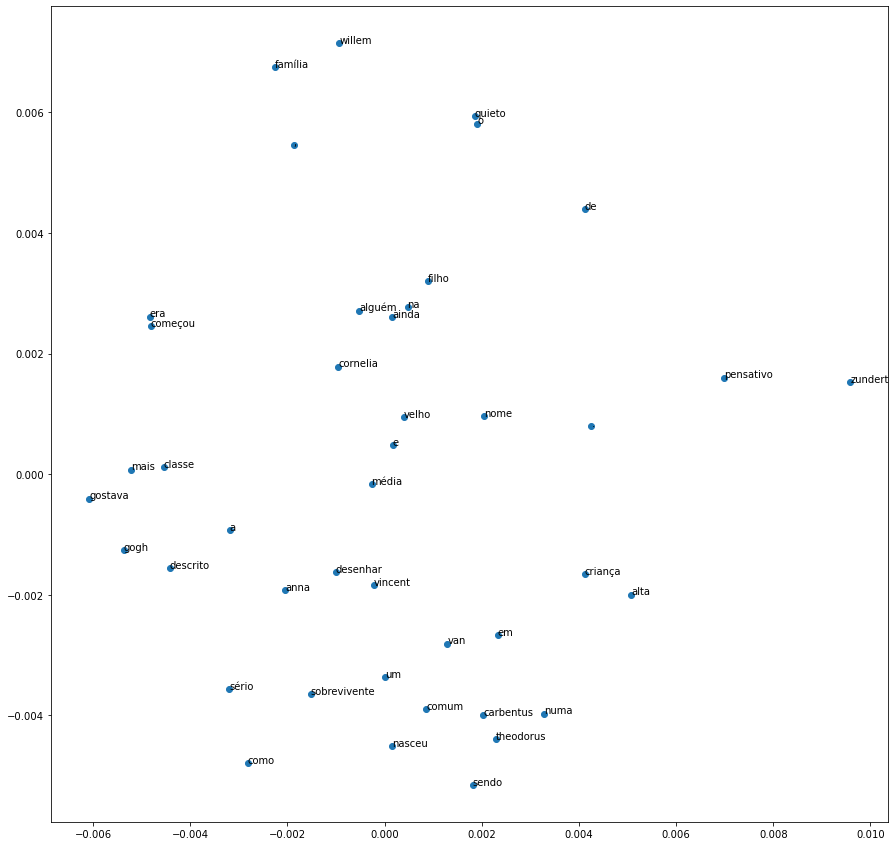

In [41]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
plt.scatter(dim[:, 0], dim[:, 1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(dim[i, 0], dim[i, 1]))
plt.show()

**Salvando os embeddings gerados**

In [42]:
model.save('model.bin')

model.wv.save_word2vec_format("model_skpg_300d.txt")

**Carregando Modelo .bin**

In [43]:
model_bin = Word2Vec.load('model.bin')

model_bin['gogh'][0:5]

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([-0.00084711,  0.00163782, -0.00050171, -0.00160037, -0.0014911 ],
      dtype=float32)

**Carregando Modelo .txt**

In [44]:
from gensim.models import KeyedVectors

model_txt = KeyedVectors.load_word2vec_format('model_skpg_300d.txt')

model_txt['gogh'][0:5]

array([-0.00084711,  0.00163782, -0.00050171, -0.00160037, -0.0014911 ],
      dtype=float32)

In [45]:
model_txt.most_similar('vincent')

[('sendo', 0.091798335313797),
 ('mais', 0.08804845809936523),
 ('theodorus', 0.08766737580299377),
 ('sério', 0.0704948902130127),
 ('gostava', 0.06669310480356216),
 ('como', 0.05231217294931412),
 ('nome', 0.048502277582883835),
 ('velho', 0.04802588000893593),
 ('nasceu', 0.04470539838075638),
 ('média', 0.03886643797159195)]

## Visualizando no tensorboard

Execute a celula abaixo, e carregue os arquivos gerados no http://projector.tensorflow.org/

In [46]:
import io

# Vector file, `\t` seperated the vectors and `\n` seperate the words
"""
0.1\t0.2\t0.5\t0.9
0.2\t0.1\t5.0\t0.2
0.4\t0.1\t7.0\t0.8
"""
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')

# Meta data file, `\n` seperated word
"""
token1
token2
token3
"""
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Write meta file and vector file
for index in range(len(model_txt.index2word)):
    word = model_txt.index2word[index]
    vec = model_txt.vectors[index]
    out_m.write(word + "\n")
    out_v.write(''.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

# Exemplo: Embeddings de textos de Machado de Assis
Vamos utilizar o Word2Vec para produzir uma representação vetorial e visualização das palavras de textos de um corpus do livro de Memórias Póstumas de Brás Cubas, no corpus do NLTK

In [47]:
!pip install nltk

     |████████████████████████████████| 1.4 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 723 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 3.6 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=bebfcb5090bed84853c41e8ea3b8ce4d63951f43eb646b7bfc8a53dc32528bf1
  Stored in directory: /home/jovyan/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk


In [48]:
import nltk
nltk.download('punkt')
nltk.download('machado')

from nltk.corpus import machado

print(machado.readme())

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package machado to /home/jovyan/nltk_data...


Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

In [49]:
nltk.download("machado")

[nltk_data] Downloading package machado to /home/jovyan/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

In [50]:
import numpy as np
import os
from nltk.corpus import machado
import unicodedata

# Remove acentos e coloca palavras em minúsculas
def strip_accents_and_lower(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn').lower()

machado_sents = map(lambda sent: list(map(strip_accents_and_lower, sent)), machado.sents())

# 'Executa' o mapeamento da lista
%time machado_sents = list(machado_sents)

CPU times: user 18.2 s, sys: 0 ns, total: 18.2 s
Wall time: 18.2 s


Utilize as sentenças da variável `machado_sents` para treinar e visualizar o embedding produzido

In [51]:
model_machado = Word2Vec(machado_sents,
                 sg=1, #0 para CBOW
                 size=300,
                 workers=multiprocessing.cpu_count(),
                 iter=5,
                 negative=5,
                 min_count=1)

Exiba as palavras mais próximas da lista abaixo

In [52]:
# Exibe algumas palavras próximas daquelas contidas nesta lista
test_words = ['seja', 'foi', 'amou', 'aquele', 'foram', 'homem', 'rua', 'marcela']

# Embedding de uma palavra
def word_embedding(word):
    return model_machado.wv[word]

# Pega apenas as palavras a partir do resultado da função 'most_similar'
def strip_score(result):
    return [w for w, s in result]
    
# Lista as palavras mais próximas
def closest_words(word, num=5):
    word_score_pair = model_machado.wv.most_similar(word, topn=num)
    return strip_score(word_score_pair)

for w in test_words:
    print(w, closest_words(w))

seja ['haja', 'for', 'sera', 'significa', 'ache']
foi ['fui', 'serviu', 'correu', 'obteve', 'substituiu']
amou ['amara', 'loucamente', 'amei', 'soubera', 'casaria']
aquele ['esse', 'remoto', 'misterioso', 'imenso', 'melancolico']
foram ['ficaram', 'vieram', 'seriam', 'iam', 'fizeram']
homem ['sujeito', 'animal', 'marinheiro', 'individuo', 'cavaleiro']
rua ['ouvidor', 'esquina', 'quitanda', 'ourives', 'invalidos']
marcela ['aflita', 'mucama', 'alberta', 'conrado', 'celestina']
